## About this Dataset
+ Context

When a bank receives a loan application, based on the applicant’s profile the bank has to make a decision regarding whether to go ahead with the loan approval or not. Two types of risks are associated with the bank’s decision."

"If the applicant is a good credit risk, i.e. is likely to repay the loan, then not approving the loan to the person results in a loss of business to the bank
If the applicant is a bad credit risk, i.e. is not likely to repay the loan, then approving the loan to the person results in a financial loss to the bank."

The predictors that may potentially have any influence on Creditability:

+ Account Balance: No account (1), None (No balance) (2), Some Balance (3)

+ Payment Status: Some Problems (1), Paid Up (2), No Problems (in this bank) (3)

+ Savings/Stock Value: None, Below 100 DM, [100, 1000] DM, Above 1000 DM

+ Employment Length: Below 1 year (including unemployed), [1, 4), [4, 7), Above 7

+ Sex/Marital Status: Male Divorced/Single, Male Married/Widowed, Female

+ No of Credits at this bank: 1, More than 1

+ Guarantor: None, Yes

+ Concurrent Credits: Other Banks or Dept Stores, None

+ ForeignWorker variable may be dropped from the study

+ Purpose of Credit: New car, Used car, Home Related, Other

https://online.stat.psu.edu/stat508/resource/analysis/gcd

Content

The German Credit Data contains data on 20 variables and the classification whether an applicant is considered a Good or a Bad credit risk for 1000 loan applicants. A predictive model developed on this data is expected to provide a bank manager guidance for making a decision whether to approve a loan to a prospective applicant based on his/her profiles.

Acknowledgements
https://online.stat.psu.edu/stat508/resource/analysis/gcd

Photo by Alice Pasqual on Unsplash

Inspiration
Unemployment in time of crisis.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('german.csv', sep=';')
data.head()

,Creditability,Account_Balance,Duration_of_Credit_monthly,Payment_Status_of_Previous_Credit,Purpose,Credit_Amount,Value_Savings_Stocks,Length_of_current_employment,Instalment_per_cent,Sex_Marital_Status,...,Duration_in_Current_address,Most_valuable_available_asset,Age_years,Concurrent_Credits,Type_of_apartment,No_of_Credits_at_this_Bank,Occupation,No_of_dependents,Telephone,Foreign_Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2


In [4]:
data.shape

(1000, 21)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Creditability                      1000 non-null   int64
 1   Account_Balance                    1000 non-null   int64
 2   Duration_of_Credit_monthly         1000 non-null   int64
 3   Payment_Status_of_Previous_Credit  1000 non-null   int64
 4   Purpose                            1000 non-null   int64
 5   Credit_Amount                      1000 non-null   int64
 6   Value_Savings_Stocks               1000 non-null   int64
 7   Length_of_current_employment       1000 non-null   int64
 8   Instalment_per_cent                1000 non-null   int64
 9   Sex_Marital_Status                 1000 non-null   int64
 10  Guarantors                         1000 non-null   int64
 11  Duration_in_Current_address        1000 non-null   int64
 12  Most_valuable_availab

In [7]:
data.Creditability.value_counts()

1    700
0    300
Name: Creditability, dtype: int64

In [8]:
data.isnull().sum()

Creditability                        0
Account_Balance                      0
Duration_of_Credit_monthly           0
Payment_Status_of_Previous_Credit    0
Purpose                              0
Credit_Amount                        0
Value_Savings_Stocks                 0
Length_of_current_employment         0
Instalment_per_cent                  0
Sex_Marital_Status                   0
Guarantors                           0
Duration_in_Current_address          0
Most_valuable_available_asset        0
Age_years                            0
Concurrent_Credits                   0
Type_of_apartment                    0
No_of_Credits_at_this_Bank           0
Occupation                           0
No_of_dependents                     0
Telephone                            0
Foreign_Worker                       0
dtype: int64

In [13]:
# Target
y = data.Creditability

# Features
X = data.drop('Creditability', axis = 1)

In [15]:
features = X.columns
features

Index(['Account_Balance', 'Duration_of_Credit_monthly',
       'Payment_Status_of_Previous_Credit', 'Purpose', 'Credit_Amount',
       'Value_Savings_Stocks', 'Length_of_current_employment',
       'Instalment_per_cent', 'Sex_Marital_Status', 'Guarantors',
       'Duration_in_Current_address', 'Most_valuable_available_asset',
       'Age_years', 'Concurrent_Credits', 'Type_of_apartment',
       'No_of_Credits_at_this_Bank', 'Occupation', 'No_of_dependents',
       'Telephone', 'Foreign_Worker'],
      dtype='object')

<AxesSubplot:ylabel='Frequency'>

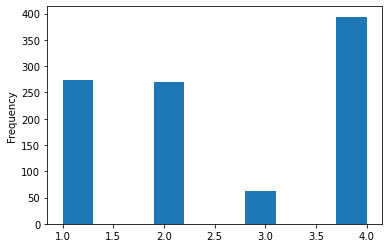

In [16]:
X.Account_Balance.plot(kind = 'hist')

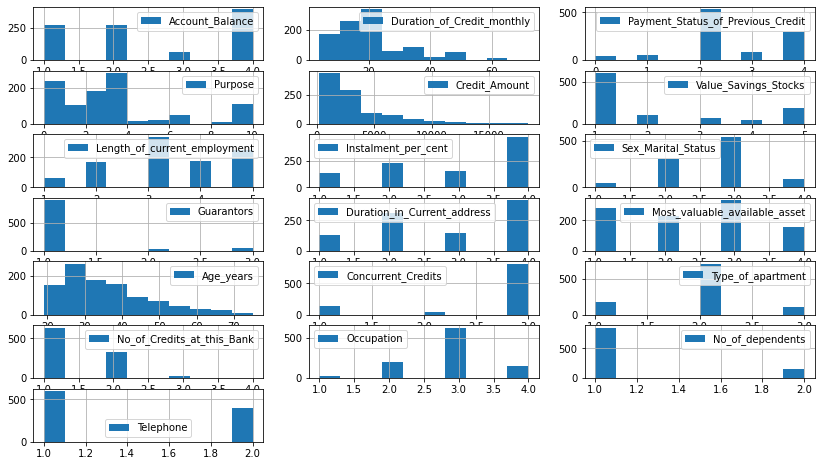

In [32]:
plt.figure(figsize = (14, 8))
for i, j in zip(range(1, 20), features):
    
    plt.subplot(7, 3, i)
    
    X[j].hist(label = j)
    
    plt.legend()

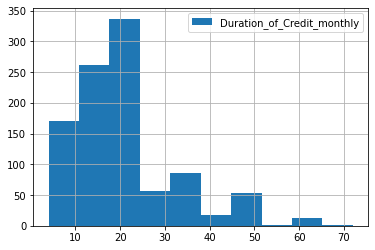

In [44]:
X['Duration_of_Credit_monthly'].hist(label = features[1])
plt.legend()

In [46]:
X['Payment_Status_of_Previous_Credit'].value_counts()

2    530
4    293
3     88
1     49
0     40
Name: Payment_Status_of_Previous_Credit, dtype: int64

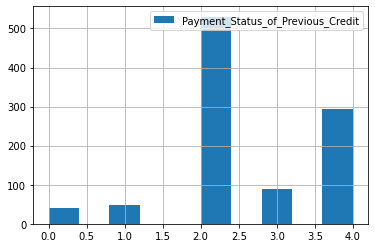

In [51]:
X['Payment_Status_of_Previous_Credit'].hist(label = [features[2]])
plt.legend()

In [56]:
X['Purpose'].value_counts()

3     280
0     234
2     181
1     103
9      97
6      50
5      22
4      12
10     12
8       9
Name: Purpose, dtype: int64

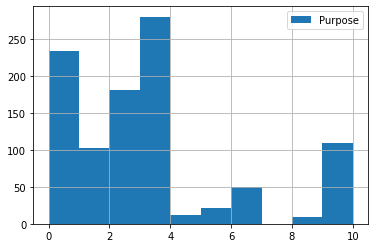

In [55]:
X['Purpose'].hist(label = features[3])
plt.legend()

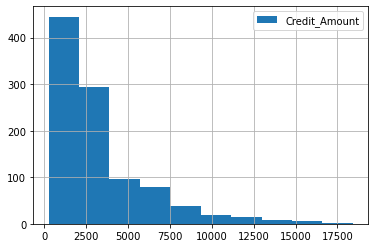

In [70]:
X['Credit_Amount'].hist(label = features[4])
plt.legend()

In [60]:
X['Credit_Amount'].describe()

count     1000.00000
mean      3271.24800
std       2822.75176
min        250.00000
25%       1365.50000
50%       2319.50000
75%       3972.25000
max      18424.00000
Name: Credit_Amount, dtype: float64

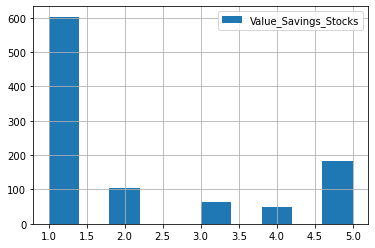

In [61]:
X['Value_Savings_Stocks'].hist(label = features[5])
plt.legend()

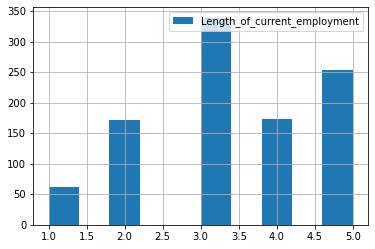

In [63]:
X['Length_of_current_employment'].hist(label = features[6])
plt.legend()

<AxesSubplot:>

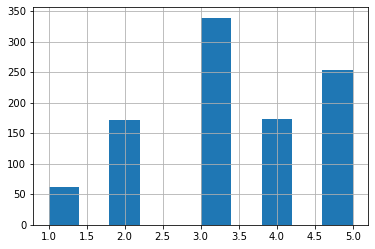

In [64]:
X['Length_of_current_employment'].hist(label = 'Length_of_current_employment')

<AxesSubplot:>

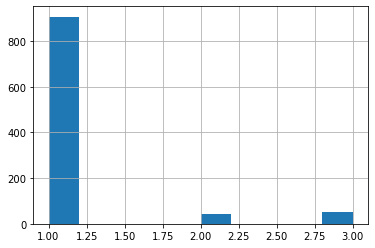

In [65]:
X['Guarantors'].hist(label = 'Guarantors')

<AxesSubplot:>

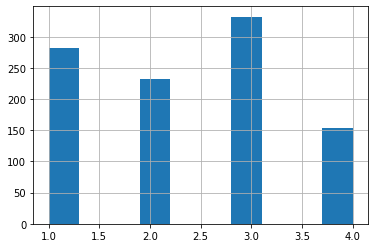

In [66]:
X['Most_valuable_available_asset'].hist(label = 'Most_valuable_available_asset')

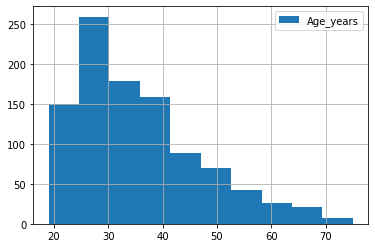

In [72]:
X['Age_years'].hist(label = 'Age_years')
plt.legend()

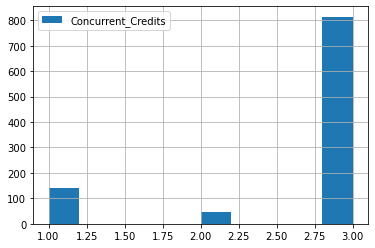

In [73]:
X['Concurrent_Credits'].hist(label = 'Concurrent_Credits')
plt.legend()

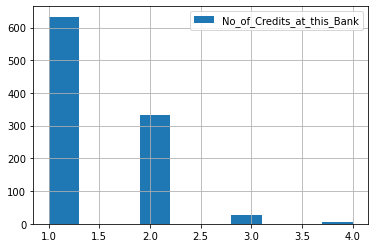

In [74]:
X['No_of_Credits_at_this_Bank'].hist(label = 'No_of_Credits_at_this_Bank')
plt.legend()

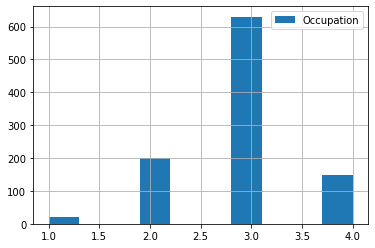

In [75]:
X['Occupation'].hist(label = 'Occupation')
plt.legend()

<AxesSubplot:xlabel='Age_years', ylabel='Credit_Amount'>

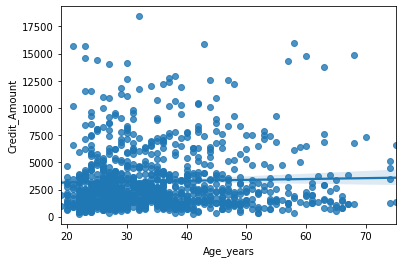

In [87]:
sns.regplot(x = X['Age_years'], y = X['Credit_Amount'])

## Predictive Modelling

In [93]:
# Tree-based
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# LogisticRegression
from sklearn.linear_model import LogisticRegression

# Distance-based
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Preprocessing 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Model Validation
from sklearn import metrics

In [90]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2)

+ ## DecisionTree

In [91]:
model_dt = DecisionTreeClassifier(random_state = 0)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [94]:
preds_dt = model_dt.predict(X_valid)
acc_score = metrics.accuracy_score(y_valid, preds_dt)
print(f'DecisionTree Accuracy: {acc_score}')

class_report = metrics.classification_report(y_valid, preds_dt)
print(class_report)

DecisionTree Accuracy: 0.61
              precision    recall  f1-score   support

           0       0.38      0.40      0.39        62
           1       0.72      0.70      0.71       138

    accuracy                           0.61       200
   macro avg       0.55      0.55      0.55       200
weighted avg       0.62      0.61      0.61       200



+ ## RandomForest

In [95]:
model_rf = RandomForestClassifier(random_state = 11)
model_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=11)

In [97]:
preds_rf = model_rf.predict(X_valid)
acc_score = metrics.accuracy_score(y_valid, preds_rf)
print(f'RandomForest Accuracy: {acc_score}')

class_report = metrics.classification_report(y_valid, preds_rf)
print(class_report)

RandomForest Accuracy: 0.725
              precision    recall  f1-score   support

           0       0.57      0.45      0.50        62
           1       0.77      0.85      0.81       138

    accuracy                           0.73       200
   macro avg       0.67      0.65      0.66       200
weighted avg       0.71      0.72      0.72       200



+ ## LogisticRegression

In [103]:
model_lr = LogisticRegression(max_iter = 1000)
model_lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [104]:
preds_lr = model_lr.predict(X_valid)
acc_score = metrics.accuracy_score(y_valid, preds_lr)
print(f'LogisticRegression Accuracy: {acc_score}')

class_report = metrics.classification_report(y_valid, preds_lr)
print(class_report)

LogisticRegression Accuracy: 0.695
              precision    recall  f1-score   support

           0       0.51      0.39      0.44        62
           1       0.75      0.83      0.79       138

    accuracy                           0.69       200
   macro avg       0.63      0.61      0.62       200
weighted avg       0.68      0.69      0.68       200



+ ## SupportVector

In [98]:
model_svc = SVC()
model_svc.fit(X_train, y_train)

SVC()

In [101]:
preds_svc = model_svc.predict(X_valid)
acc_score = metrics.accuracy_score(y_valid, preds_svc)
print(f'SupportVector Accuracy: {acc_score}')

class_report = metrics.classification_report(y_valid, preds_svc)
print(class_report)

SupportVector Accuracy: 0.685
              precision    recall  f1-score   support

           0       0.40      0.03      0.06        62
           1       0.69      0.98      0.81       138

    accuracy                           0.69       200
   macro avg       0.55      0.51      0.44       200
weighted avg       0.60      0.69      0.58       200



+ ## KNeighbors

In [105]:
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [106]:
preds_knn = model_knn.predict(X_valid)
acc_score = metrics.accuracy_score(y_valid, preds_knn)
print(f'KNeighbors Accuracy: {acc_score}')

class_report = metrics.classification_report(y_valid, preds_knn)
print(class_report)

KNeighbors Accuracy: 0.655
              precision    recall  f1-score   support

           0       0.38      0.18      0.24        62
           1       0.70      0.87      0.78       138

    accuracy                           0.66       200
   macro avg       0.54      0.52      0.51       200
weighted avg       0.60      0.66      0.61       200

